In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import seaborn as sns
from panco2 import PressureProfileFitter
from utils import gNFW
import results
import os
from astropy.table import Table
import astropy.units as u
from fklib import mapview

# NIKA2-like

## Test 0

- $M_{500} = 3.5 \times 10^{14} \, M_\odot$, $z= 0.865$
- A10 pressure profile
- 4 arcmin map, 18 arcsec FWHM beam, no transfer function
- White noise

### Create map

In [ ]:
path = "../tests/test0/"

ppf = PressureProfileFitter(
    "../tests/nk2_actj0215_15.fits",
    4, 5, 0.865, M_500=3.5e14, map_size=6.1
)
r_bins = np.logspace(
    np.log10(ppf.cluster.arcsec2kpc(ppf.pix_size)),
    np.log10(ppf.cluster.arcsec2kpc(ppf.map_size * 30)),
    50
)
ppf.define_model("binned", r_bins)
P_bins = gNFW(ppf.model.r_bins, *ppf.cluster.A10_params)
par_vec = np.append(P_bins, [-12.0, 0.0])
ppf.add_filtering(beam_fwhm=18.0)

ppf.write_sim_map(par_vec, f"{path}/map.fits", filter_noise=False)
results.set_plot_style("seaborn")
mapview.fitsview(f"{path}/map.fits", 1, smooth=0.5, imrange="sym")
fig, ax = plt.subplots()
ax.loglog(r_bins, P_bins, "o-")

### Fit

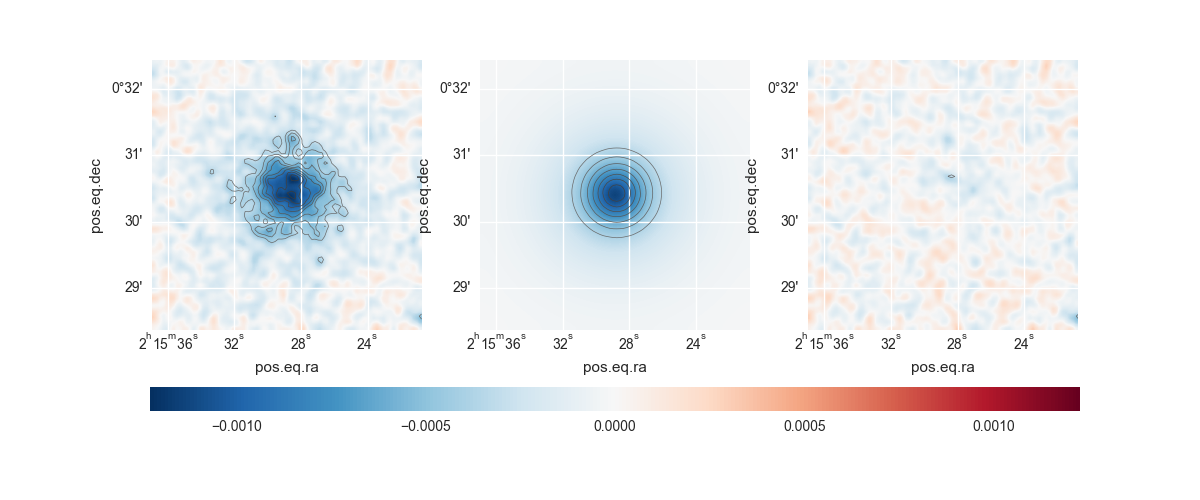

In [3]:
path = "../tests/test0/"

ppf = PressureProfileFitter(
    f"{path}/map.fits", 1, 2,
    0.865, M_500=3.5e14, map_size=4.0
)

r_bins = ppf.default_radial_binning(18.0 / 2)

ppf.define_model("binned", r_bins)
P_bins = gNFW(ppf.model.r_bins, *ppf.cluster.A10_params)
par_vec = np.append(P_bins, [-11.9, 0.0])
par_dic = ppf.model.par_vec2dic(par_vec)

ppf.add_filtering(beam_fwhm=18.0)
ppf.define_priors(
    P_bins=[ss.loguniform(0.1 * P, 10.0 * P) for P in P_bins],
    conv=ss.norm(-11.90, 1.19),
    zero=ss.norm(0.0, 1e-4)
)
ppf.dump_to_file(f"{path}/ppf.panco2")
results.set_plot_style("seaborn")
results.plot_data_model_residuals(ppf, par_vec=par_vec, lims="sym", smooth=1.0)

/Users/fkeruzore/.miniconda3/envs/panco2/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
  1%|▌                                                             | 502/50000 [00:24<39:20, 20.97it/s]

False False False
    500 iterations = 14.3*tau (tau = 34.9 -> dtau/tau = 1.0000)


  2%|█▏                                                           | 1003/50000 [00:48<39:52, 20.48it/s]

False False False
    1000 iterations = 17.7*tau (tau = 56.6 -> dtau/tau = 0.3843)


  3%|█▊                                                           | 1504/50000 [01:12<39:20, 20.54it/s]

False False False
    1500 iterations = 22.5*tau (tau = 66.6 -> dtau/tau = 0.1505)


  4%|██▍                                                          | 2004/50000 [01:36<41:17, 19.37it/s]

False False False
    2000 iterations = 25.8*tau (tau = 77.6 -> dtau/tau = 0.1408)


  5%|███                                                          | 2502/50000 [02:00<40:19, 19.63it/s]

False False False
    2500 iterations = 30.8*tau (tau = 81.1 -> dtau/tau = 0.0438)


  6%|███▋                                                         | 3004/50000 [02:24<39:02, 20.06it/s]

False False False
    3000 iterations = 34.4*tau (tau = 87.3 -> dtau/tau = 0.0711)


  7%|████▎                                                        | 3503/50000 [02:48<39:34, 19.58it/s]

False False False
    3500 iterations = 36.9*tau (tau = 94.8 -> dtau/tau = 0.0785)


  8%|████▉                                                        | 4003/50000 [03:12<38:57, 19.68it/s]

False False False
    4000 iterations = 39.8*tau (tau = 100.5 -> dtau/tau = 0.0567)


  9%|█████▍                                                       | 4504/50000 [03:37<39:22, 19.26it/s]

False False False
    4500 iterations = 42.4*tau (tau = 106.1 -> dtau/tau = 0.0530)


 10%|██████                                                       | 5004/50000 [04:01<38:45, 19.35it/s]

False False False
    5000 iterations = 46.4*tau (tau = 107.8 -> dtau/tau = 0.0156)


 11%|██████▋                                                      | 5504/50000 [04:25<38:56, 19.05it/s]

False False False
    5500 iterations = 50.2*tau (tau = 109.6 -> dtau/tau = 0.0169)


 12%|███████▎                                                     | 6003/50000 [04:49<39:53, 18.38it/s]

False False False
    6000 iterations = 53.4*tau (tau = 112.4 -> dtau/tau = 0.0246)


 13%|███████▉                                                     | 6504/50000 [05:13<37:51, 19.15it/s]

True False False
    6500 iterations = 57.3*tau (tau = 113.4 -> dtau/tau = 0.0094)


 14%|████████▌                                                    | 7003/50000 [05:38<38:27, 18.63it/s]

False True False
    7000 iterations = 60.9*tau (tau = 115.0 -> dtau/tau = 0.0135)


 15%|█████████▏                                                   | 7501/50000 [06:02<44:31, 15.91it/s]

True False False
    7500 iterations = 64.8*tau (tau = 115.7 -> dtau/tau = 0.0060)


 16%|█████████▊                                                   | 8002/50000 [06:26<38:29, 18.18it/s]

False True False
    8000 iterations = 68.4*tau (tau = 116.9 -> dtau/tau = 0.0105)


 17%|██████████▎                                                  | 8503/50000 [06:51<42:36, 16.23it/s]

False False False
    8500 iterations = 70.8*tau (tau = 120.0 -> dtau/tau = 0.0257)


 18%|██████████▉                                                  | 9003/50000 [07:15<42:02, 16.25it/s]

False False False
    9000 iterations = 73.9*tau (tau = 121.7 -> dtau/tau = 0.0142)


 19%|███████████▌                                                 | 9504/50000 [07:39<38:51, 17.37it/s]

False False False
    9500 iterations = 77.1*tau (tau = 123.2 -> dtau/tau = 0.0121)


 20%|████████████                                                | 10002/50000 [08:04<41:36, 16.02it/s]

False False False
    10000 iterations = 79.1*tau (tau = 126.4 -> dtau/tau = 0.0249)


 21%|████████████▌                                               | 10502/50000 [08:28<40:16, 16.34it/s]

False False False
    10500 iterations = 81.2*tau (tau = 129.3 -> dtau/tau = 0.0227)


 22%|█████████████▏                                              | 11002/50000 [08:52<39:51, 16.31it/s]

False False False
    11000 iterations = 83.3*tau (tau = 132.0 -> dtau/tau = 0.0205)


 23%|█████████████▊                                              | 11503/50000 [09:16<39:13, 16.36it/s]

False False False
    11500 iterations = 86.0*tau (tau = 133.8 -> dtau/tau = 0.0133)


 24%|██████████████▍                                             | 12004/50000 [09:41<36:01, 17.58it/s]

True False False
    12000 iterations = 90.0*tau (tau = 133.4 -> dtau/tau = 0.0029)


 25%|███████████████                                             | 12504/50000 [10:05<36:01, 17.35it/s]

True True False
    12500 iterations = 93.0*tau (tau = 134.4 -> dtau/tau = 0.0077)


 26%|███████████████▌                                            | 13003/50000 [10:29<40:12, 15.33it/s]

False True False
    13000 iterations = 97.7*tau (tau = 133.0 -> dtau/tau = 0.0107)


 27%|████████████████▏                                           | 13503/50000 [10:53<37:16, 16.32it/s]

True False True
    13500 iterations = 100.8*tau (tau = 133.9 -> dtau/tau = 0.0070)


 28%|████████████████▊                                           | 14003/50000 [11:17<36:39, 16.36it/s]

False True True
    14000 iterations = 103.2*tau (tau = 135.6 -> dtau/tau = 0.0123)


 29%|█████████████████▍                                          | 14502/50000 [11:41<35:57, 16.45it/s]

True False True
    14500 iterations = 107.3*tau (tau = 135.1 -> dtau/tau = 0.0035)


 30%|██████████████████                                          | 15000/50000 [12:05<28:13, 20.67it/s]


True True True
    15000 iterations = 110.4*tau (tau = 135.9 -> dtau/tau = 0.0053)
    -> Convergence achieved
Running time: 00h12m06s


(<Figure size 800x550 with 2 Axes>,
 array([<AxesSubplot:ylabel='Integrated autocorrelation time $\\tau_i$'>,
        <AxesSubplot:xlabel='MCMC step $i$', ylabel='$|\\tau_{i - 1} - \\tau_{i}| \\; / \\; \\tau_{i}$'>],
       dtype=object))

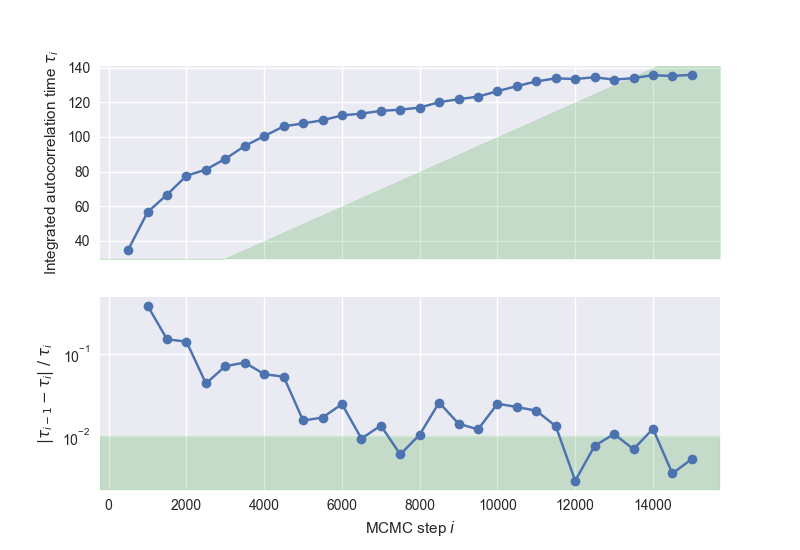

In [15]:
f = ppf.run_mcmc(30, 5e4, 6, n_check=5e2, max_delta_tau=0.01, min_autocorr_times=100, out_chains_file=f"{path}/raw_chains.npz")
results.plot_acf(ppf, max_delta_tau=0.01, min_autocorr_times=100)

In [16]:
chains_clean = results.load_chains(f"{path}/raw_chains.npz", 200, 20)

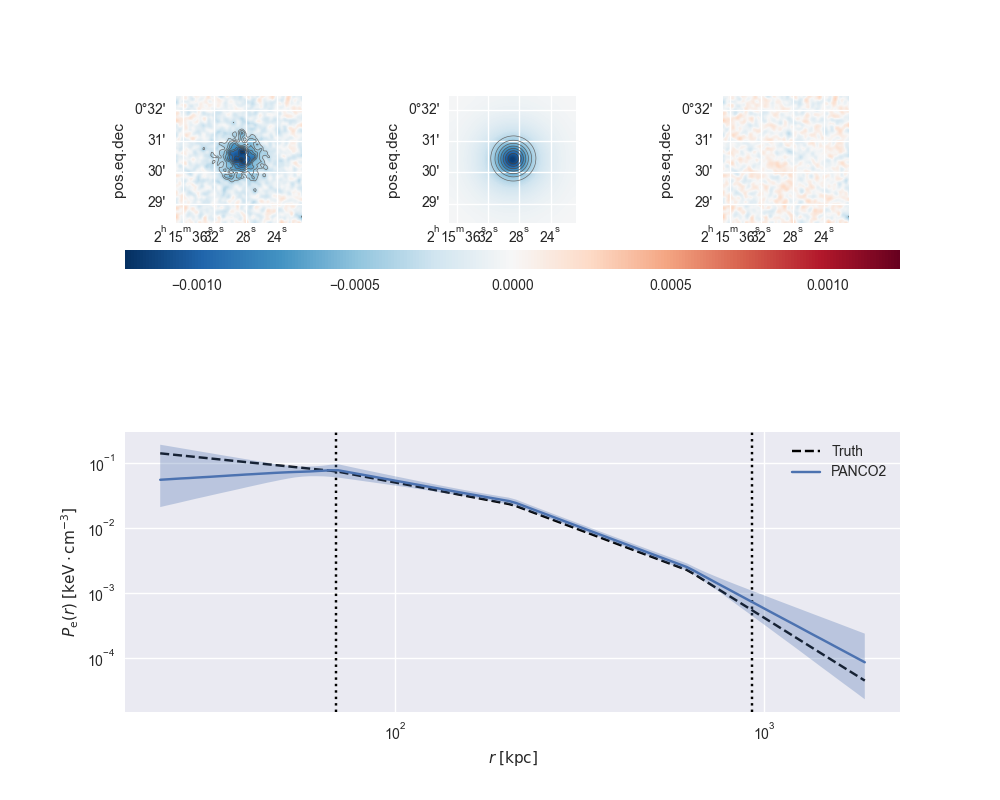

In [17]:
plt.close("all")
results.set_plot_style("seaborn")
results.mcmc_corner_plot(chains_clean, model=ppf.model, show_probs=False, filename=f"{path}/corner.png")
results.mcmc_trace_plot(chains_clean, filename=f"{path}/trace.png")
fig = results.plot_results(ppf, chains_clean, truth_vec=par_vec)
fig.savefig(f"{path}/results.pdf")

## Test 1

- $M_{500} = 3.5 \times 10^{14} \, M_\odot$, $z= 0.865$
- A10 pressure profile
- 4 arcmin map, 18 arcsec FWHM beam, no transfer function
- White noise

### Create map

In [ ]:
path = "../tests/test1/"

ppf = PressureProfileFitter(
    "../tests/nk2_actj0215_15.fits",
    4, 5, 0.865, M_500=3.5e14, map_size=4.0
)
r_bins = np.logspace(
    np.log10(ppf.cluster.arcsec2kpc(9.0)), np.log10(ppf.cluster.arcsec2kpc(180.0)), 50
)
ppf.define_model("binned", r_bins)
gnfw_par = np.copy(ppf.cluster.A10_params)
gnfw_par[0] *= 3.2 / 8.4
gnfw_par[1] *= 1.0510 / 1.083
gnfw_par[2] = 1.40
gnfw_par[4] = 0.20
P_bins = gNFW(ppf.model.r_bins, *gnfw_par)
par_vec = np.append(P_bins, [-12.0, 0.0])
ppf.add_filtering(beam_fwhm=18.0)

ppf.write_sim_map(par_vec, f"{path}/map.fits")

### Fit

In [ ]:
path = "../tests/test1/"

ppf = PressureProfileFitter(
    f"{path}/map.fits",
    1,
    2,
    0.865,
    M_500=3.5e14,
)

r_bins = np.logspace(
    np.log10(ppf.cluster.arcsec2kpc(9.0)), np.log10(ppf.cluster.arcsec2kpc(180.0)), 5
)

ppf.define_model("binned", r_bins)
gnfw_par = np.copy(ppf.cluster.A10_params)
gnfw_par[0] *= 3.2 / 8.4
gnfw_par[1] *= 1.0510 / 1.083
gnfw_par[2] = 1.40
gnfw_par[4] = 0.20
P_bins = gNFW(ppf.model.r_bins, *gnfw_par)
par_vec = np.append(P_bins, [-12.0, 0.0])
par_dic = ppf.model.par_vec2dic(par_vec)

ppf.add_filtering(beam_fwhm=18.0)
ppf.define_priors(
    P_bins=[ss.loguniform(0.1 * P, 10.0 * P) for P in P_bins],
    conv=ss.norm(-11.90, 1.19),
    zero=ss.norm(0.0, 1e-4)
)
ppf.dump_to_file(f"{path}/ppf.panco2")

In [ ]:
f = ppf.run_mcmc(30, 1e4, 6, n_check=1e3, out_chains_file=f"{path}/raw_chains.npz")

In [ ]:
chains_clean = results.load_chains(f"{path}/raw_chains.npz", 200, 20)

In [ ]:
plt.close("all")
results.set_plot_style("seaborn")
results.mcmc_corner_plot(chains_clean, model=ppf.model, show_probs=False, filename=f"{path}/corner.png")
results.mcmc_trace_plot(chains_clean, filename=f"{path}/trace.png")
plt.close("all")
results.set_plot_style("seaborn")
fig = results.plot_results(ppf, chains_clean, truth_vec=par_vec)
fig.savefig(f"{path}/results.pdf")

## Test 2

- $M_{500} = 3.5 \times 10^{14} \, M_\odot$, $z= 0.865$
- A10 pressure profile
- 4 arcmin map, 18 arcsec FWHM beam, transfer function
- White noise

### Create map

In [ ]:
path = "../tests/test2/"
if not os.path.isdir(path):
    os.makedirs(path)

ppf = PressureProfileFitter(
    "../tests/nk2_actj0215_15.fits",
    4, 5, 0.865, M_500=3.5e14, map_size=5.0
)
r_bins = np.logspace(
    np.log10(ppf.cluster.arcsec2kpc(9.0)), np.log10(ppf.cluster.arcsec2kpc(180.0)), 50
)
ppf.define_model("binned", r_bins)
P_bins = gNFW(ppf.model.r_bins, *ppf.cluster.A10_params)
par_vec = np.append(P_bins, [-12.0, 0.0])

tf = Table.read("../tests/nk2_tf.fits")
ppf.add_filtering(beam_fwhm=18.0, k=tf["k"].to("arcmin-1").value, tf_k=tf["tf_2mm"].value)

ppf.write_sim_map(par_vec, f"{path}/map.fits", filter_noise=False)
mapview.fitsview(f"{path}/map.fits", 1, smooth=1.0, imrange="sym")

### Fit

In [ ]:
path = "../tests/test2/"

ppf = PressureProfileFitter(
    f"{path}/map.fits",
    1,
    2,
    0.865,
    M_500=3.5e14,
    map_size=4.0
)

r_bins = np.logspace(
    np.log10(ppf.cluster.arcsec2kpc(9.0)), np.log10(ppf.cluster.arcsec2kpc(180.0)), 5
)

ppf.define_model("binned", r_bins)
P_bins = gNFW(ppf.model.r_bins, *ppf.cluster.A10_params)
par_vec = np.append(P_bins, [-12.0, 0.0])
par_dic = ppf.model.par_vec2dic(par_vec)

ppf.add_filtering(beam_fwhm=18.0, k=tf["k"].to("arcmin-1").value, tf_k=tf["tf_2mm"].value)
ppf.define_priors(
    P_bins=[ss.loguniform(0.1 * P, 10.0 * P) for P in P_bins],
    conv=ss.norm(-12.0, 1.2),
    zero=ss.norm(0.0, 1e-4)
)
ppf.dump_to_file(f"{path}/ppf.panco2")
plt.close("all")
results.plot_data_model_residuals(ppf, par_vec=par_vec, lims="sym", smooth=1.0)

In [ ]:
f = ppf.run_mcmc(30, 5e4, 6, n_check=1e3, out_chains_file=f"{path}/raw_chains.npz")

In [ ]:
chains_clean = results.load_chains(f"{path}/raw_chains.npz", 200, 20)

In [ ]:
plt.close("all")
results.set_plot_style("seaborn")
results.mcmc_corner_plot(chains_clean, model=ppf.model, show_probs=False, filename=f"{path}/corner.png")
results.mcmc_trace_plot(chains_clean, filename=f"{path}/trace.png")
plt.close("all")
results.set_plot_style("seaborn")
fig = results.plot_results(ppf, chains_clean, truth_vec=par_vec)
fig.savefig(f"{path}/results.pdf")

In [ ]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(ppf.autocorr[0], ppf.autocorr[1], "o-")
axs[1].semilogy(ppf.autocorr[0, 1:], np.ediff1d(ppf.autocorr[1]) / ppf.autocorr[1, :-1], "o-")

In [ ]:
np.roll(np.arange(5), 1)

## Test 3

- $M_{500} = 5.5 \times 10^{14} \, M_\odot$, $z= 0.565$
- A10 pressure profile
- 6 arcmin map, 18 arcsec FWHM beam, transfer function
- White noise

### Create map

In [ ]:
path = "../tests/test3/"
if not os.path.isdir(path):
    os.makedirs(path)

ppf = PressureProfileFitter(
    "../tests/nk2_actj0215_15.fits",
    4, 5, 0.565, M_500=5.5e14, map_size=6.0
)
r_bins = np.logspace(
    np.log10(ppf.cluster.arcsec2kpc(9.0)), np.log10(ppf.cluster.arcsec2kpc(180.0)), 50
)
ppf.define_model("binned", r_bins)
P_bins = gNFW(ppf.model.r_bins, *ppf.cluster.A10_params)
par_vec = np.append(P_bins, [-12.0, 0.0])

tf = Table.read("../tests/nk2_tf.fits")
ppf.add_filtering(beam_fwhm=18.0, k=tf["k"].to("arcmin-1").value, tf_k=tf["tf_2mm"].value)

ppf.write_sim_map(par_vec, f"{path}/map.fits")

### Fit

In [ ]:
path = "../tests/test3/"

ppf = PressureProfileFitter(
    f"{path}/map.fits",
    1,
    2,
    0.565,
    M_500=5.5e14,
)

r_bins = np.logspace(
    np.log10(ppf.cluster.arcsec2kpc(9.0)), np.log10(ppf.cluster.arcsec2kpc(180.0)), 8
)

ppf.define_model("binned", r_bins)
P_bins = gNFW(ppf.model.r_bins, *ppf.cluster.A10_params)
par_vec = np.append(P_bins, [-11.9, 0.0])
par_dic = ppf.model.par_vec2dic(par_vec)

ppf.add_filtering(beam_fwhm=18.0, k=tf["k"].to("arcmin-1").value, tf_k=tf["tf_2mm"].value)
ppf.define_priors(
    P_bins=[ss.loguniform(0.1 * P, 10.0 * P) for P in P_bins],
    conv=ss.norm(-11.90, 1.19),
    zero=ss.norm(0.0, 1e-4)
)
ppf.dump_to_file(f"{path}/ppf.panco2")

In [ ]:
f = ppf.run_mcmc(30, 1e4, 6, n_check=1e3, out_chains_file=f"{path}/raw_chains.npz")

In [ ]:
chains_clean = results.load_chains(f"{path}/raw_chains.npz", 200, 20)

In [ ]:
plt.close("all")
results.set_plot_style("seaborn")
results.mcmc_corner_plot(chains_clean, model=ppf.model, show_probs=False, filename=f"{path}/corner.png")
results.mcmc_trace_plot(chains_clean, filename=f"{path}/trace.png")
plt.close("all")
results.set_plot_style("seaborn")
fig = results.plot_results(ppf, chains_clean, truth_vec=par_vec)
fig.savefig(f"{path}/results.pdf")

# Non-NIKA2

## Test 4

- $M_{500} = 5 \times 10^{14} \, M_\odot$, $z = 0.1$
- A10 pressure profile
- 30 arcmin map, 1 arcmin FWHM beam, no transfer function
- White noise

### Create map

In [ ]:
path = "../tests/test4/"
if not os.path.isdir(path):
    os.makedirs(path)

ppf = PressureProfileFitter(
    "../tests/ACTlike.fits",
    1, 2, 0.1, M_500=5e14, map_size=61.0
)
r_bins = np.logspace(
    np.log10(ppf.cluster.arcsec2kpc(30.0)), np.log10(ppf.cluster.arcsec2kpc(3600.0)), 100
)
ppf.define_model("binned", r_bins)
P_bins = gNFW(ppf.model.r_bins, *ppf.cluster.A10_params)
par_vec = np.append(P_bins, [1.0, 0.0])

ppf.add_filtering(beam_fwhm=60.0)

ppf.write_sim_map(par_vec, f"{path}/map.fits", filter_noise=True)
mapview.fitsview(f"{path}/map.fits", 1, smooth=0.0, imrange="sym")

### Fit

In [ ]:
path = "../tests/test4/"

ppf = PressureProfileFitter(
    f"{path}/map.fits",
    1, 2, 0.1, M_500=5e14, map_size=10.0
)

r_bins = np.logspace(
    np.log10(ppf.cluster.arcsec2kpc(30.0)), np.log10(ppf.cluster.arcsec2kpc(15.0 * 60)), 8
)

ppf.define_model("binned", r_bins)
P_bins = gNFW(ppf.model.r_bins, *ppf.cluster.A10_params)
par_vec = np.append(P_bins, [1.0, 0.0])
par_dic = ppf.model.par_vec2dic(par_vec)

ppf.add_filtering(beam_fwhm=60.0)
ppf.define_priors(
    P_bins=[ss.loguniform(0.1 * P, 10.0 * P) for P in P_bins],
    conv=ss.norm(1.0, 0.1),
    zero=ss.norm(0.0, 1e-6)
)
ppf.dump_to_file(f"{path}/ppf.panco2")
results.plot_data_model_residuals(ppf, par_vec=par_vec, lims="sym", smooth=0)

In [ ]:
f = ppf.run_mcmc(30, 1e5, 6, n_check=1e3, out_chains_file=f"{path}/raw_chains.npz")

In [ ]:
chains_clean = results.load_chains(f"{path}/raw_chains.npz", 200, 20)

In [ ]:
plt.close("all")
results.set_plot_style("seaborn")
results.mcmc_corner_plot(chains_clean, model=ppf.model, show_probs=False, filename=f"{path}/corner.png")
results.mcmc_trace_plot(chains_clean, show_probs=False, filename=f"{path}/trace.png")
fig = results.plot_results(ppf, chains_clean, truth_vec=par_vec)
fig.savefig(f"{path}/results.pdf")

In [ ]:
results.plot_acf(ppf)